# PREDICTIVE MODEL ON BANK MARKETING DATA

### Read in the file and get basic information about the data, including numerical summaries

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to confirm whether the customer is going to accept the product of the bank (fixed deposit/term deposit) or not.

Our goal is to predict if the client will subscribe to the bank product or not (yes/no for the variable 'response').

### Attribute Information:

><br>- $age$ : Age of the customer <br>- $job$ : Type of job <br>- $salary$ : Salary of the customer <br>- $marital$ : Marital status of the customer<br>- $education$ : Educational qualification of the customer<br>- $targeted$ : Based on certain attributes and responses from previous campaigns whether the customer is targeted or not <br>- $default$ : Any due payments on credits<br>- $balance$ : Account balance of customer<br>- $housing$ : Whether the customer has got housing loan or not<br>- $loan$ : Whether the customer has got existing personal loan or not<br>- $contact$ : The medium oevr which communication occurred <br>- $day$ : Last contacted day of the of the month<br>- $month$ : In which month was the last contact happened<br>- $duration$ : Last contacted duration in seconds<br>- $campaign$ : Number of contacts occurred for a particular client during this campaign<br>- $pdays$ : Number of days that passed by after the client was last contacted from a previous campaign (-1 for clients who were not previously contacted)<br>- $previous$ : Number of contacts performed before this campaign and for this client<br>- $poutcome$ : Outcome of the previous marketing campaign<br><br> <b>THE TARGET VARIABLE</b><br>- $response$ : Has the client subscribed a term deposit (fixed deposit)? (binary: 'yes','no')

In [1]:
# importing some necessary libraries upfront

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

df = pd.read_csv('bank-marketing.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 19)

In [5]:
# checking for null values 

df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

>We don't have any null values in our dataset.

In [6]:
# Checking for duplicate values

df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [8]:
numerical_columns = [col for col in df.columns[:] if df[col].dtype == 'int64']
print(numerical_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [9]:
categorical_columns = [col for col in df.columns[:] if df[col].dtype == "object"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


In [10]:
for col in categorical_columns:
    print("Unique values in",col,"=", df[col].unique())

Unique values in job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital = ['married' 'single' 'divorced']
Unique values in education = ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted = ['yes' 'no']
Unique values in default = ['no' 'yes']
Unique values in housing = ['yes' 'no']
Unique values in loan = ['no' 'yes']
Unique values in contact = ['unknown' 'cellular' 'telephone']
Unique values in month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome = ['unknown' 'failure' 'other' 'success']
Unique values in response = ['no' 'yes']


>These are the different values in each categorical columns.

In [11]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


This gives the general statistical summary of our numerical coumns. 

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [12]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [13]:
print("Mean : ",df['pdays'].mean ())
print("Median : ",df['pdays'].median ())
print("Minimum : ",df['pdays'].min ())

Mean :  40.19782796222158
Median :  -1.0
Minimum :  -1


>𝑝𝑑𝑎𝑦𝑠 column gives the Number of days that passed by after the client was last contacted from a previous campaign.From the description of the data -1 stands for the clients who were not previously contacted.

In [14]:
# Let's check the no.of persons who were previously contacted

percentage_of_previously_contacted_person=(df[df['pdays'] != -1]['pdays'].count()/df['pdays'].count())*100
round(percentage_of_previously_contacted_person,2)

18.26

>Only 18.26% of the total people in this campaign are previously contacted.Which creates a very huge imbalance in the column 'pdays'.Since more than 80% of people aren't previously contacted,keeping this column may reduce the accuray of our analysis.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values

In [15]:
df[df['pdays'] != -1]['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

>After eliminating the value -1,the mean and median values are changed drastically.But this mean and meidan values represents a very few proportion (just 18.2% ) of the population.So this won't help us in our analysis.

### Make a box plot for pdays. Do you see any outliers?

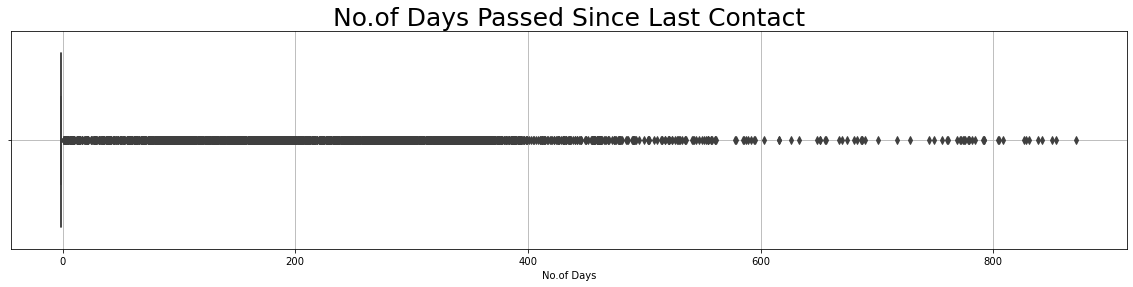

In [16]:
# boxplot with all the available datapoints in 'pdays' column.

plt.subplots(figsize=(20,4))
sns.boxplot(df.pdays)

plt.xlabel('No.of Days')
plt.title('No.of Days Passed Since Last Contact',fontsize=25)
plt.grid()

>The boxplot clearly shows what we have seen from the statistical summary of the 'pdays' column.The mean,median and minimum of 'pdays' column are -1.And all other values are distributed in a very wide range that is far from the mean and median values.

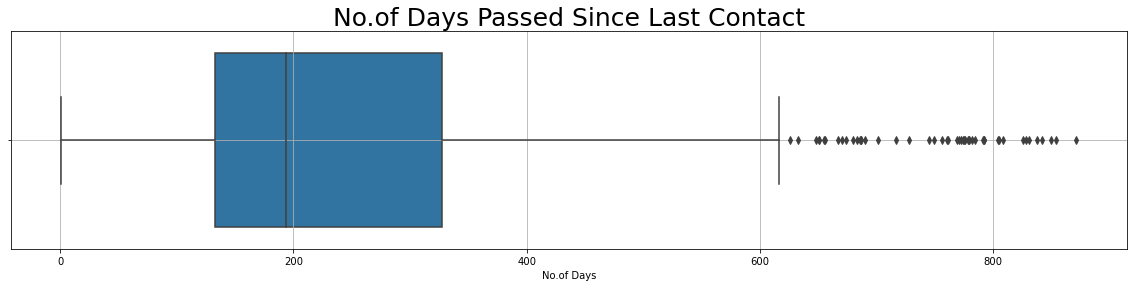

In [17]:
# boxplot after removing '-1' value from 'pdays' column.

plt.subplots(figsize=(20,4))
sns.boxplot(df[df.pdays!=-1].pdays)

plt.xlabel('No.of Days')
plt.title('No.of Days Passed Since Last Contact',fontsize=25)
plt.grid()

>- After removing the -1 value from 'pdays' column,our mean and median have changed drastically.Yes,there are still some outliers present in the data.
>- The mean and median values lies near 200.This shows that this campaign is happening around 6-7 months after the last campaign.
>- There are certain customers who have been contacted after 2-3 years.We should look for the reason for this like why didn't we contact them in last campaign? And why are we considering them in this Campaign? etc.. 

>Since 'pdays' column is having a high imbalance it might not be a good choice in our analysis.So we have to drop this column before making the model.

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [18]:
# Group the balace of people based on their education level.

educationwise_bal = df.groupby("education")['balance']

Text(0.5, 1.0, 'Education VS Balance')

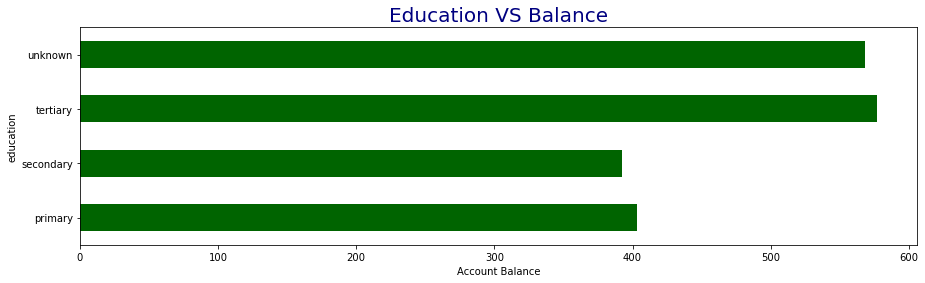

In [19]:
plt.subplots(figsize=(15,4))
educationwise_bal.median().plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('Account Balance')
plt.title('Education VS Balance',fontsize=20,color='navy')

>- From the graph it is observed that people with tertiary education have the highest median account balance.
>- Another point to be noted here is that the median balance of 'unknown' category stands close to the median balance of 'tertiary' category.Which makes me to assume that most people of the unknown category might be having a tertiary education or higher.

## Perform Bi-variate Analysis to identify the features that are directly associated with the target variable. 

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.

#### Convert the 'response' variable to a convenient form

>In order to make predictions we need to convert the target variable to machine understandable form.So let's convert the values 'yes'/'no' to 1/0 respectively.

In [20]:
df.response.replace({'no':0,'yes':1} ,inplace = True)

In [21]:
df.response.value_counts()

0    39922
1     5289
Name: response, dtype: int64

#### Make suitable plots for associations with numerical features and categorical features

>We have already stored our categorical variables to 'categorical_columns' and numerical variables to 'numerical_columns'

In [22]:
numerical_columns = [col for col in df.columns[:] if df[col].dtype == 'int64']
print(numerical_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


##### A correlation heatmap will show us the association of numerical variables among themselves.

Text(0.5, 1.0, 'Correlation Between All Numerical Variables')

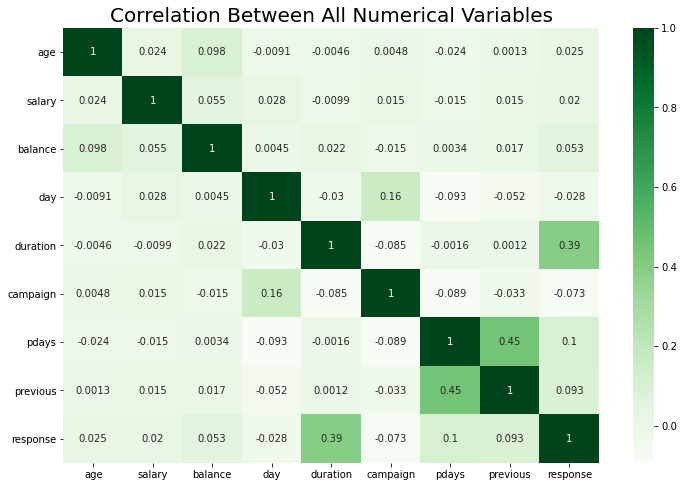

In [23]:
# Let's [plot the correlation heat map for numerical variables

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.title("Correlation Between All Numerical Variables",fontsize=20)

> Most of the variables aren't significantly correlated with each other.But a slight positive correlation exists between the following variables 
>>- 'response' and 'duration'
>>- 'pdays' and 'previous'
>>- 'day' and 'campaign'

> The correlation between 'response' and 'duration' is very much understandable that the more time we spend on a customer the higher the chance of conversion of that particular customer.

>- 𝑝𝑑𝑎𝑦𝑠  : Number of days that passed by after the client was last contacted from a previous campaign (-1 for clients who were not previously contacted)
>- 𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠 : Number of contacts performed before this campaign and for this client


Text(0, 0.5, 'No.of contacts')

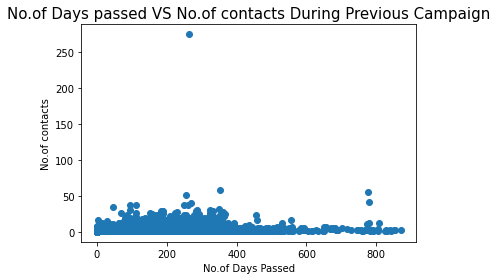

In [24]:
#let's plot a scatter plot between the variables

plt.scatter(df['pdays'],df['previous'])

plt.title("No.of Days passed VS No.of contacts During Previous Campaign",fontsize=15)
plt.xlabel("No.of Days Passed",fontsize=10)
plt.ylabel("No.of contacts",fontsize=10)

>- Most of the customers (more than 80%) hasn't previously contacted.So this correlation is not an accurate relationship.So there's a chance for reduction in accuracy of our model if we keep these variables.It's advisable to remove the pdays column before model bulding as it has such a huge imbalance.

>- 𝑑𝑎𝑦  : Last contacted day of the of the month
>- 𝑐𝑎𝑚𝑝𝑎𝑖𝑔𝑛  : Number of contacts occurred for a particular client during this campaign

Text(0, 0.5, 'No.of contacts')

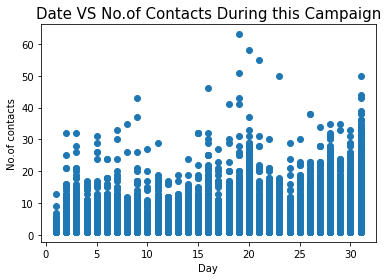

In [25]:
plt.scatter(df.day,df.campaign)

plt.title("Date VS No.of Contacts During this Campaign",fontsize=15)
plt.xlabel("Day",fontsize=10)
plt.ylabel("No.of contacts",fontsize=10)

>- The correlation is because the clients who were contacted in the first week might be re-contacted again in the last week which increases the contacts made in the last week.
>- This can be noted for the sincerity of the tele-callers of the company,but rather tha that,I don't think this influences our target variable. 

### Are the features about the previous campaign data useful?

I guess this question is about the 'previous' and 'campaign' variables.

>- 𝑝𝑟𝑒𝑣𝑖𝑜𝑢𝑠 : Number of contacts performed before this campaign and for this client
>- 𝑐𝑎𝑚𝑝𝑎𝑖𝑔𝑛  : Number of contacts occurred for a particular client during this campaign

In [26]:
df[['previous','campaign']]

,previous,campaign
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
45206,0,3
45207,0,2
45208,3,5
45209,0,4


Text(0, 0.5, 'No.of contacts during current campaign')

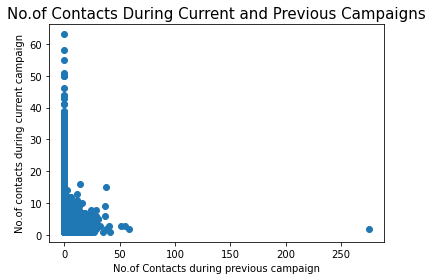

In [27]:
plt.scatter(df.previous,df.campaign)

plt.title("No.of Contacts During Current and Previous Campaigns",fontsize=15)
plt.xlabel("No.of Contacts during previous campaign",fontsize=10)
plt.ylabel("No.of contacts during current campaign",fontsize=10)

>- The plot shows that the no.of contacts made for current campaign is high for those clients, who were least contacted in previous campaigns.
>- So the 'previous' data helps in prioritising customers and giving more importance to those customers who have a better conversion chance.

##### Now let's look for association among categorical variables

In [28]:
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


> Since 'response' is our target variable let's remove it from the above column and store it in another variable.

In [29]:
# remove the target variable from categorical columns

cat_cols=categorical_columns[:-1]

In [30]:
# Let's store the response to a variable

target_variable=df.response

In [31]:
for col in cat_cols:
    print("Unique values in",col,"=", df[col].unique())

Unique values in job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital = ['married' 'single' 'divorced']
Unique values in education = ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in targeted = ['yes' 'no']
Unique values in default = ['no' 'yes']
Unique values in housing = ['yes' 'no']
Unique values in loan = ['no' 'yes']
Unique values in contact = ['unknown' 'cellular' 'telephone']
Unique values in month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome = ['unknown' 'failure' 'other' 'success']


> These are the unique values in each categorical column.

##### Since 'job' column has more no.of unique values in it, let's plot a stacked bar chart to identify the proportion of people who are converted from each job category.

In [32]:
cross_tab = pd.crosstab(index=df.job,columns=df.response,normalize='index')
cross_tab.rename(columns={0:"No",1:"Yes"},inplace=True)
cross_tab

response,No,Yes
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862444,0.137556
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


Text(0, 0.5, 'Proportion of Yes/No')

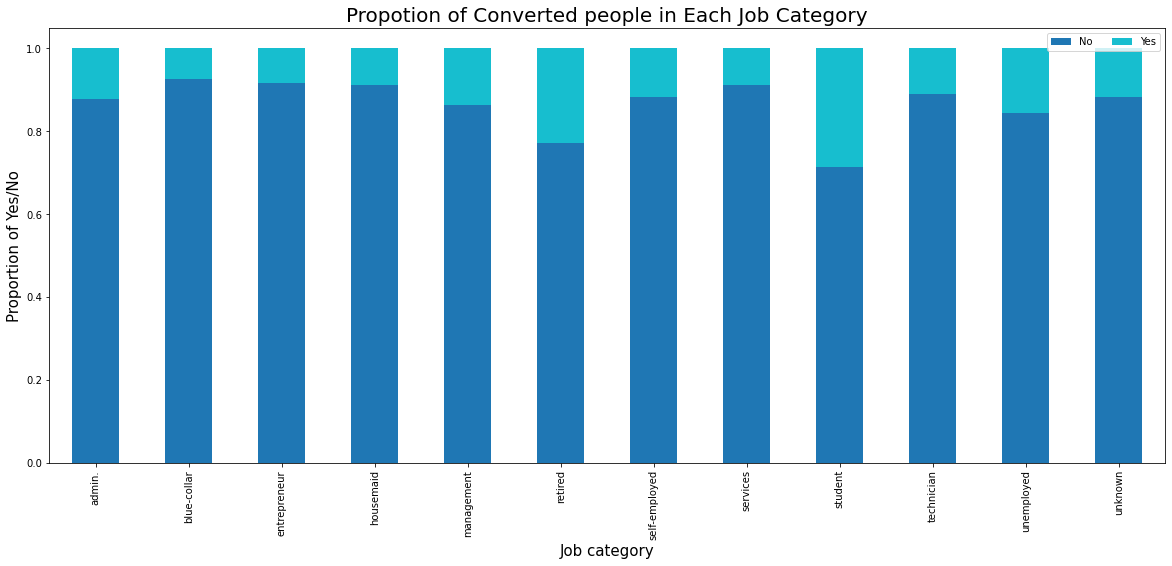

In [33]:
cross_tab.plot(kind='bar',stacked=True,colormap='tab10',figsize=(20,8))

plt.legend(loc='best',ncol=2)
plt.title("Propotion of Converted people in Each Job Category",fontsize=20)
plt.xlabel("Job category",fontsize=15)
plt.ylabel("Proportion of Yes/No",fontsize=15)

>This gives us an idea that, among all the job categories, students and retired people had a higher rate of onversion,that is,these people are more prone to start a term deposit.

##### Now let's look for no.of converted and non-converted people in each month. 

In [34]:
cross_tab2 = pd.crosstab(index=df.month,columns=df.response)
cross_tab2.rename(columns={0:"No",1:"Yes"},inplace=True)
cross_tab2 = cross_tab2.sort_values('Yes')
cross_tab2

response,No,Yes
month,,
dec,114,100
jan,1261,142
mar,229,248
sep,310,269
oct,415,323
nov,3567,403
feb,2208,441
jun,4795,546
apr,2355,577


Text(0.5, 0, 'No.of Coverted/Non-converted People')

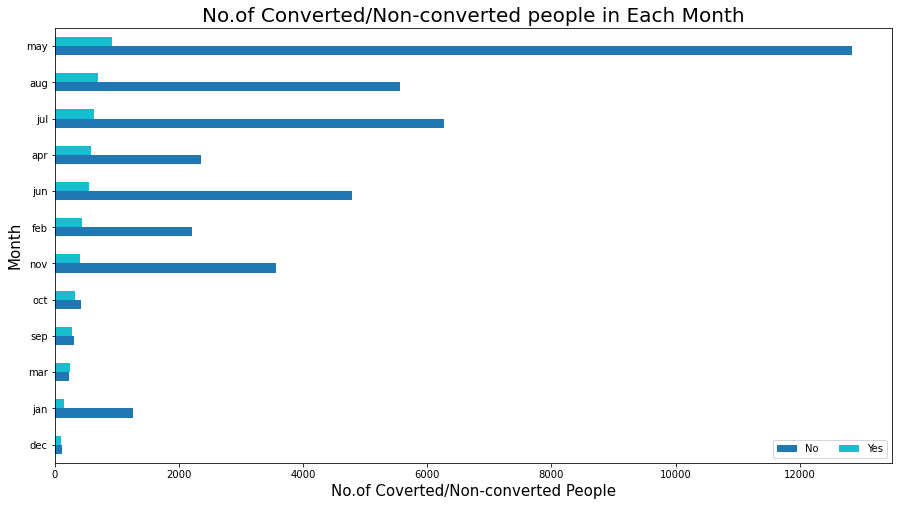

In [35]:
cross_tab2.plot(kind='barh',colormap='tab10',figsize=(15,8))

plt.legend(loc='best',ncol=2)
plt.title("No.of Converted/Non-converted people in Each Month",fontsize=20)
plt.ylabel("Month",fontsize=15)
plt.xlabel("No.of Coverted/Non-converted People",fontsize=15)

>- This graph shows that the campaign was full-floodged in the period May-Aug because more number of people were conacted during this time frame.
>- More number of conversions also happened in the initial months of the campaign.
>- There's considerable decrease in the number of people contacetd in the final months of the campaign.

##### Let's Plot the remaining categorical columns using violin plot as it gives the distribution of data clearly when there is a chance for multiple peaks in the distribution of data

In [36]:
# as we have already drawn plots for job and months let's check the remaining only.

cat_cols = categorical_columns
cat_cols.remove("job")
cat_cols.remove("month")
cat_cols.remove("response")

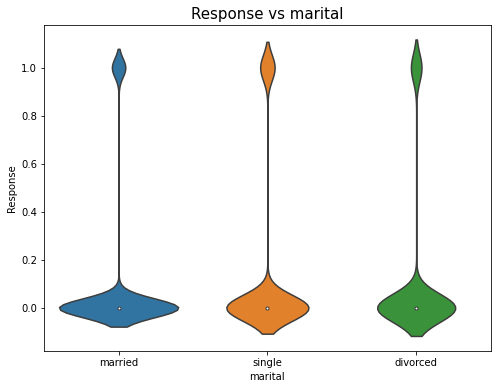

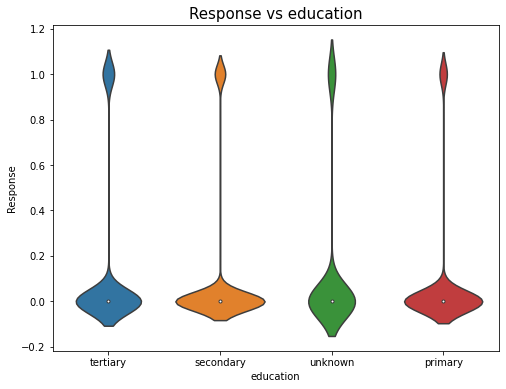

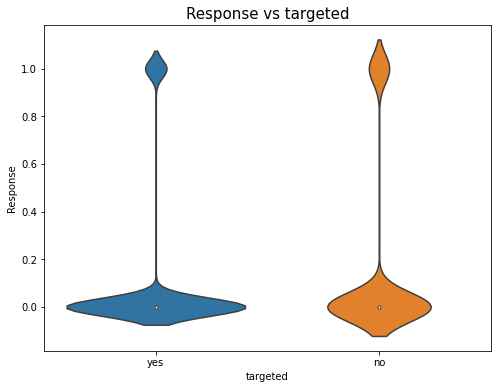

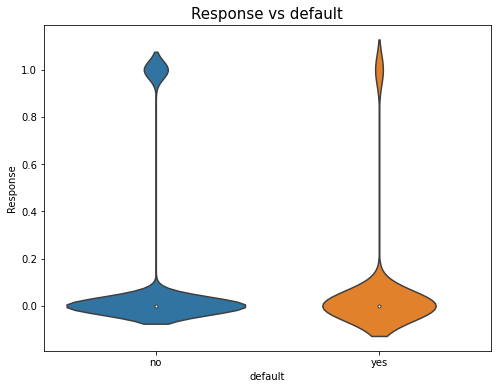

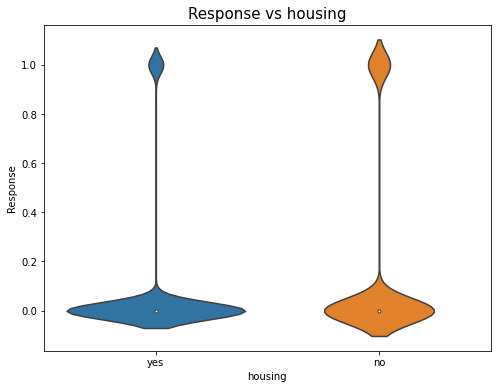

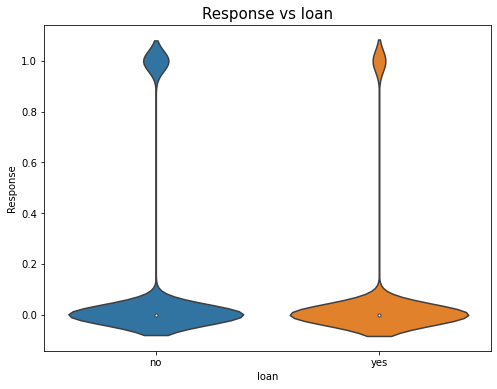

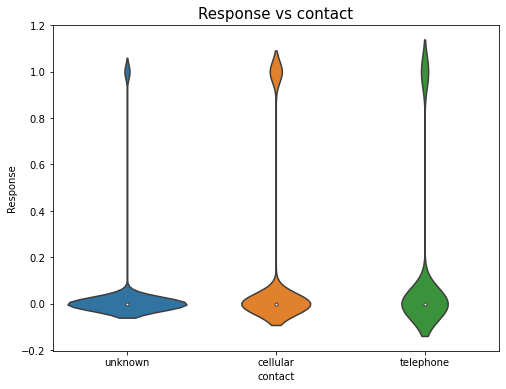

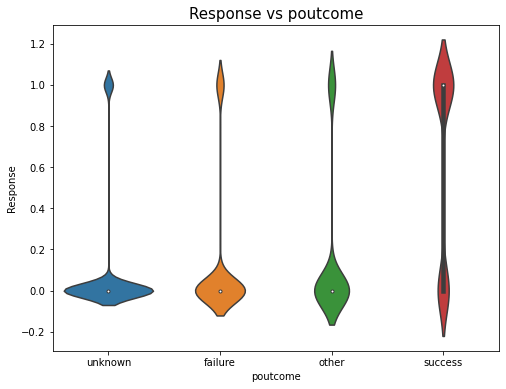

In [37]:
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.violinplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)


>- The distribution is similar for almost every category in the marital status
>- The case is similar for the response vs education graph as well.
>- The distribution shows that Most of the targeted people said a strict no.
>- Most of the people who didn't had a default due refused to accept the term deposit while there is a high variance in the response of people who had a due and still said yes to term deposit.
>- Most of the people witha housing loan or personal loan decided not to start a term deposit.
>- Most people were contacted through phone and thos who said yes shows a high variance.
>- The distribution shows that a large number of people who satrted a tern deposit in the previous campaign have shwon interest in starting a new one.

### Are pdays and poutcome associated with the target? 
> - #### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


In [38]:
# We know that 'pdays' contains '-1' which represents missing value/outlier/the person is not previously contacted.

percentage_of_unwanted_in_pdays =(df[df['pdays'] == -1]['pdays'].count()/df['pdays'].count())*100
round(percentage_of_unwanted_in_pdays,2)

81.74

>- we have already seen what's there in the pdays column.More than 80% of pdays column data cotains the value '-1'.We consider this as missing value/outlier/the person is not previously contacted. 
>- Another use of this column is that we use it predict whether the customer is previously contacted(if value is not -1) and not contacetd(if value is -1).
>- But for that we just need to check whether 'previous' column has a non zero value.
>- Thus we can conclude that this is an irrelevant column that needs to be dropped because of it's very high imbalance in data distribution.

Similarly let's now check what's there in the 'poutcome' column.

In [39]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

>- There is a record called 'unknown' which occupies the major portion of the column.
>- Just like '-1' in 'pdays' column here 'unknown' stands for missing value/outlier/the person is not previously contacted.

In [40]:
cross_tab3 = pd.crosstab(index=df.poutcome,columns=df.response)
cross_tab3.rename(columns={0:"No",1:"Yes"},inplace=True)
cross_tab3 = cross_tab3.sort_values('Yes')
cross_tab3

response,No,Yes
poutcome,,
other,1533,307
failure,4283,618
success,533,978
unknown,33573,3386


Text(0.5, 0, 'Result of Previous Campaign')

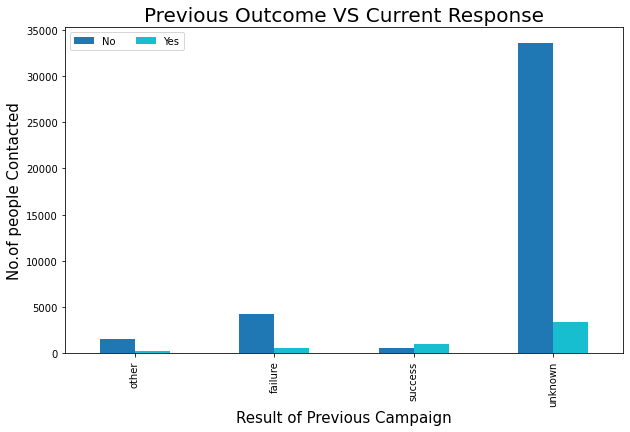

In [41]:
cross_tab3.plot(kind='bar',colormap='tab10',figsize=(10,6))

plt.legend(loc='best',ncol=2)
plt.title("Previous Outcome VS Current Response",fontsize=20)
plt.ylabel("No.of people Contacted",fontsize=15)
plt.xlabel("Result of Previous Campaign",fontsize=15)

In [42]:
# Let's check the percentage of 'unknown' in 'poutcome' column.

percentage_of_unwanted_in_poutcome = (df[df['poutcome'] == "unknown"]['poutcome'].count()/df['poutcome'].count())*100
round(percentage_of_unwanted_in_poutcome,2)

81.75

>- Here also a huge imbalance exists since more than 80% of the data is missing value/outlier/the person is not previously contacted.
>- But we can see that the customers who have started a term deposit in the previous campaign are willing to start new one.But this is less in number.
>- But in all the other sections majority of the customers are not ready to start term deposit.
>- Thus,this variable will also create imbalance in our model,so it is advisable to drop this.

We created a new column since majority of users were not previously contacted. We are capturing importance of missing values.

In [43]:
# Let's drop the pdays and poutcome columns from our dataset

df.drop(['pdays','poutcome'],axis=1,inplace=True)

### Before the predictive modeling part, make sure to perform –
###  i] The necessary transformations for the categorical variables and the numeric variables

In [44]:
categorical_columns = [col for col in df.columns[:] if df[col].dtype == "object"]
print(categorical_columns)

['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month']


In [45]:
# Let's look for different values in our categorical columns

for col in categorical_columns:
    print("\033[1m",col,"\033[0m"," :\n",df[col].value_counts(),"\t")

 job   :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 	
 marital   :
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 	
 education   :
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 	
 targeted   :
 yes    37091
no      8120
Name: targeted, dtype: int64 	
 default   :
 no     44396
yes      815
Name: default, dtype: int64 	
 housing   :
 yes    25130
no     20081
Name: housing, dtype: int64 	
 loan   :
 no     37967
yes     7244
Name: loan, dtype: int64 	
 contact   :
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 	
 month   :
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     264

>- 'job','education' and 'contact' have 'unkown' value in it.This actually represents the missing values/actual unknown values. 

Text(0.5, 1.0, 'Education VS Mean Balance')

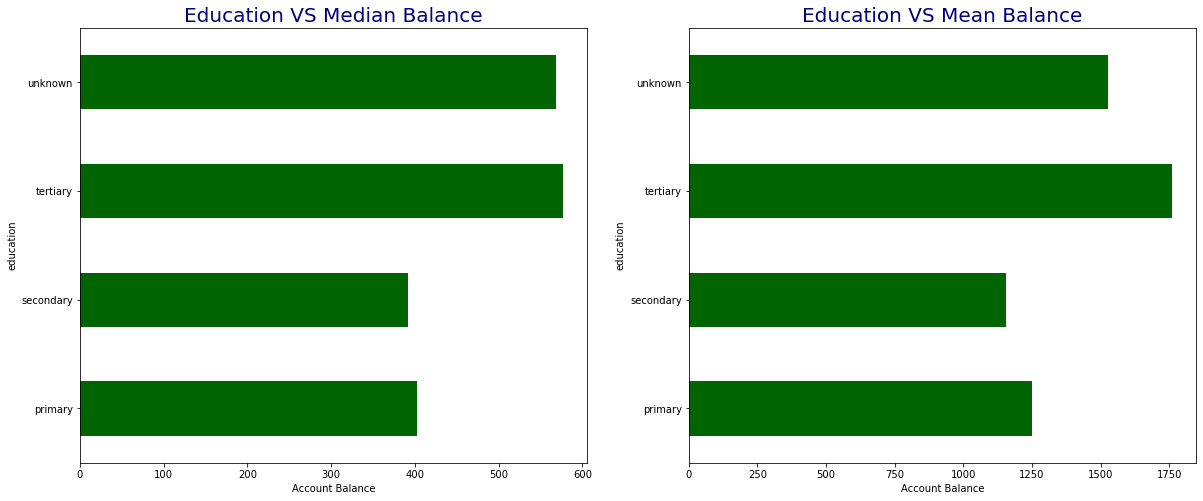

In [46]:
plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)

educationwise_bal.median().plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('Account Balance')
plt.title('Education VS Median Balance',fontsize=20,color='navy')

plt.subplot(1,2,2)

educationwise_bal.mean().plot(kind='barh',color='darkgreen', fontsize=10)
plt.xlabel('Account Balance')
plt.title('Education VS Mean Balance',fontsize=20,color='navy')

>- In 'education' column we can see that the median and mean of balance of 'tertiary' and 'unknown' are nearly equal compared to other two.So let's impute 'unknown' here with 'tertiary'.
>- In 'contact' nearly 40% of the data are 'unknown'.But we know that a bank has only a certain modes of contacting the customers.So it might be email/text_message other than cellular and telephone.So let's impute this 'unknown' with 'e-mail/message'.

In [47]:
# imputing the unkown values.

df.education.replace("unknown","tertiary",inplace=True)
df.contact.replace("unknown","e-mail/message",inplace=True)

##### Now let's clean up the numerical columns

In [48]:
numerical_columns = [col for col in df.columns[:] if df[col].dtype == 'int64']
print(numerical_columns)

['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'previous', 'response']


> The major threat in numerical columns might be the presence of outliers in it.So let's first check for outliers in our the data

In [49]:
# Describing the statistical summary of every numerical variables

for col in numerical_columns[:-1]:
    print("\033[1m",col,"\033[0m")
    print("Skewness Value is : ",df[col].skew())
    print()
    print(df[col].describe())

 age 
Skewness Value is :  0.6848179257252598

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
 salary 
Skewness Value is :  0.13782909379095207

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64
 balance 
Skewness Value is :  8.360308326166326

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64
 day 
Skewness Value is :  0.09307901402122411

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000

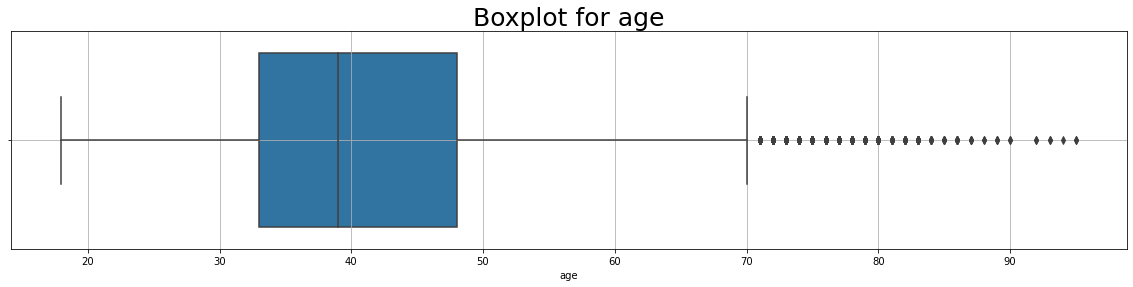

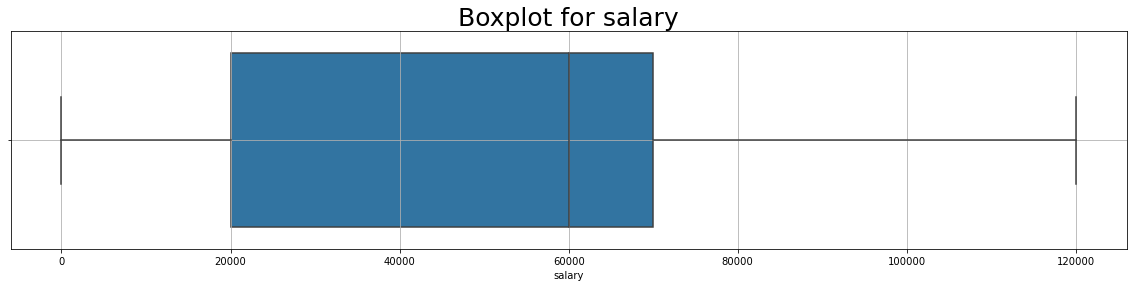

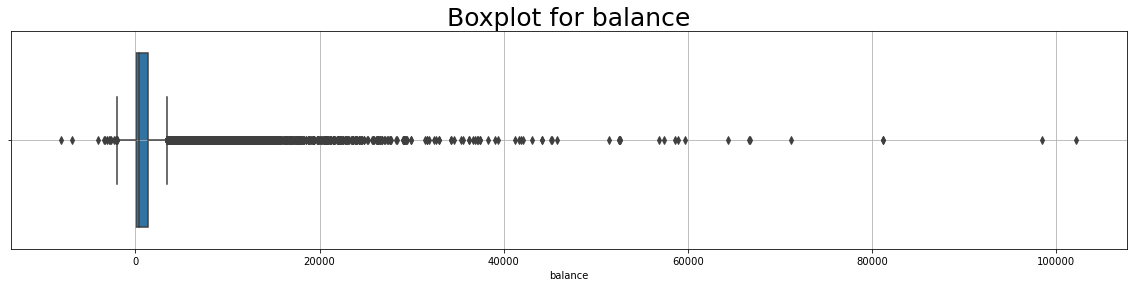

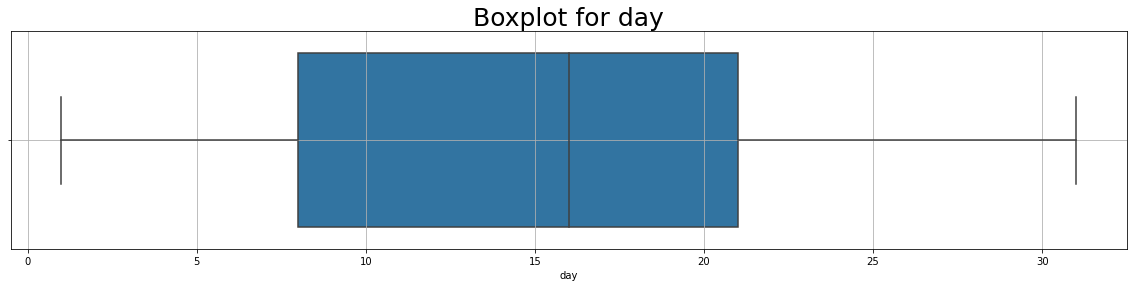

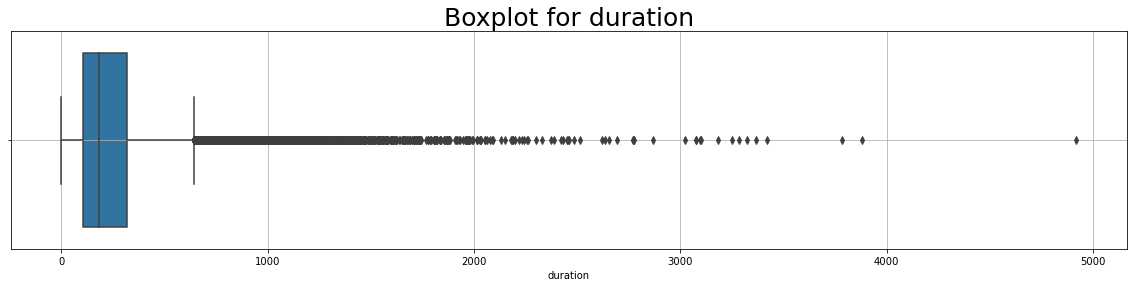

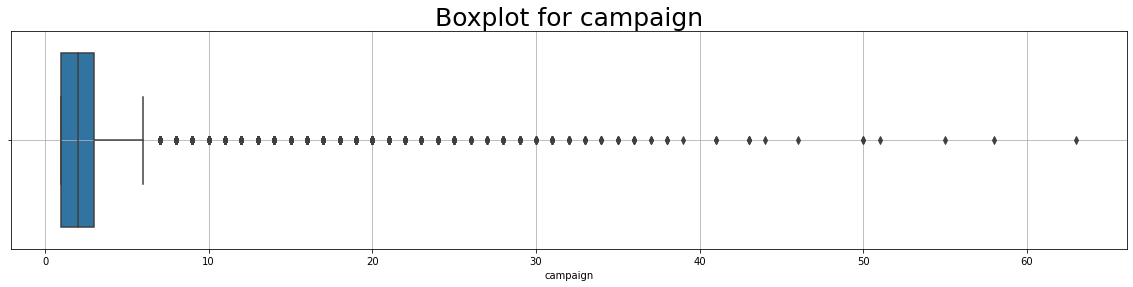

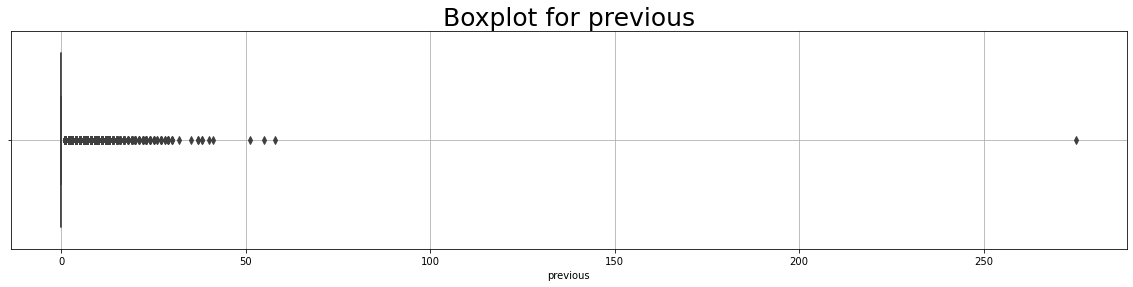

In [50]:
# Plotting boxplot for every numerical variable

for col in numerical_columns[:-1]:
    plt.subplots(figsize=(20,4))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title('Boxplot for '+col,fontsize=25)
    plt.grid()

>- The boxplot for age shows that there are outliers in the 'age' column.The skewness value(0.68) shows the slightly right skewed distribution of our data.We just can't remove all the values above the upper whisker as a bank might have customers of various ages, even above 80.So we will impute age > 80 with the age 80.
>- Boxplot for balance,duration,campaign and previous shows outliers in the data as well as a very high skewness value also.Let's use the Inter Quartile Range (IQR) to deal with the outliers here.

In [51]:
# limiting the max value in age column to 80

df.loc[df['age']>80,'age']=80

In [52]:
print("new skewness value :",df['age'].skew())
df.age.describe()

new skewness value : 0.6518404275886445


count    45211.000000
mean        40.926898
std         10.581391
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         80.000000
Name: age, dtype: float64

>- A slight decrease in skewness is observed

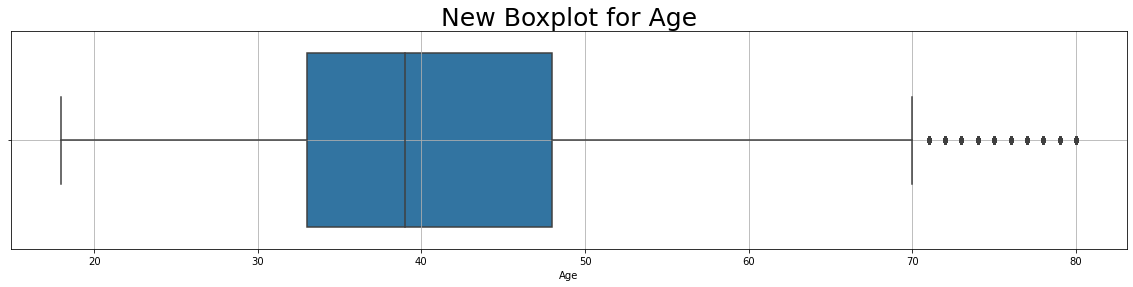

In [53]:
plt.subplots(figsize=(20,4))
sns.boxplot(df['age'])
plt.xlabel('Age')
plt.title('New Boxplot for Age',fontsize=25)
plt.grid()

> The outliers are considerabley reduced.It's better to keep the remaining outliers, as the values above the upper whisker are also important for this variable. 

In [54]:
# calculating different quartile ranges

cols = ['balance','duration','campaign','previous']
for i in cols:
    print("\033[1m",i,"\033[0m")
    print()
    iQ1 = np.quantile(df[i], 0.25)
    iQ2 = np.quantile(df[i], 0.50)
    iQ3 = np.quantile(df[i], 0.75)
    print("first quartile :",iQ1,"\n","second quartile :",iQ2,"\n","third quartile :",iQ3,"\n")
    
    iIQR = iQ3 - iQ1 
    iUW = iQ3 + (1.5 * iIQR)
    iLW = iQ1 - (1.5 * iIQR)
    print("inter quartile range :",iIQR,"\n","Upper whisker :",iUW,"\n","Lower whisker :",iLW,"\n")

 balance 

first quartile : 72.0 
 second quartile : 448.0 
 third quartile : 1428.0 

inter quartile range : 1356.0 
 Upper whisker : 3462.0 
 Lower whisker : -1962.0 

 duration 

first quartile : 103.0 
 second quartile : 180.0 
 third quartile : 319.0 

inter quartile range : 216.0 
 Upper whisker : 643.0 
 Lower whisker : -221.0 

 campaign 

first quartile : 1.0 
 second quartile : 2.0 
 third quartile : 3.0 

inter quartile range : 2.0 
 Upper whisker : 6.0 
 Lower whisker : -2.0 

 previous 

first quartile : 0.0 
 second quartile : 0.0 
 third quartile : 0.0 

inter quartile range : 0.0 
 Upper whisker : 0.0 
 Lower whisker : 0.0 



> The 'previous' column shows anomalous behaviour.So let's treat that seperately.

In [55]:
# Outlier removal using IQR function

cols2 = ['balance','duration','campaign']
for i in cols2:
    iQ1 = np.quantile(df[i], 0.25)
    iQ2 = np.quantile(df[i], 0.50)
    iQ3 = np.quantile(df[i], 0.75)

    iIQR = iQ3 - iQ1 
    iUW = iQ3 + (1.5 * iIQR)
    iLW = iQ1 - (1.5 * iIQR)
    
    df[i] = np.where(df[i] > iUW, iUW, df[i])
    df[i] = np.where(df[i]< iLW, iLW, df[i])

In [56]:
# ckeck for the new skewness value

for j in cols2:
    print("New skewness value of ",j," is ",df[j].skew())

New skewness value of  balance  is  1.0978021758668195
New skewness value of  duration  is  1.0375736846374077
New skewness value of  campaign  is  1.0991152915287266


> The skewness value has come down to a greater extent.So the data are now in a clean and balanced state

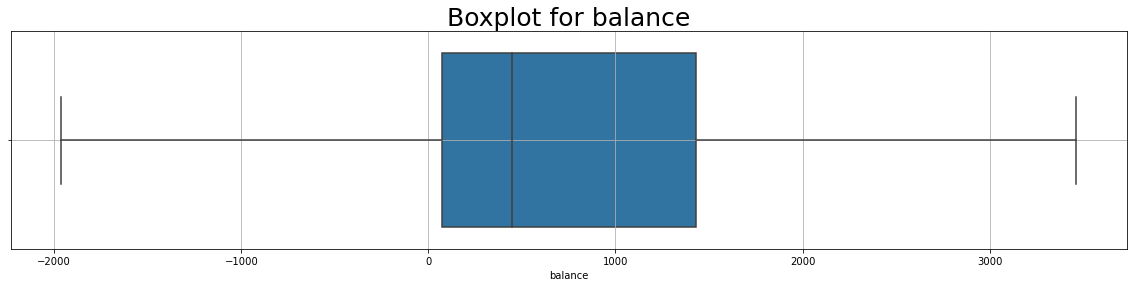

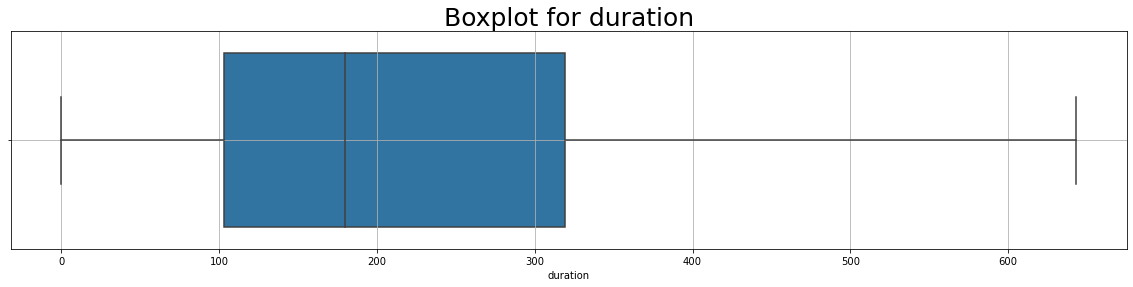

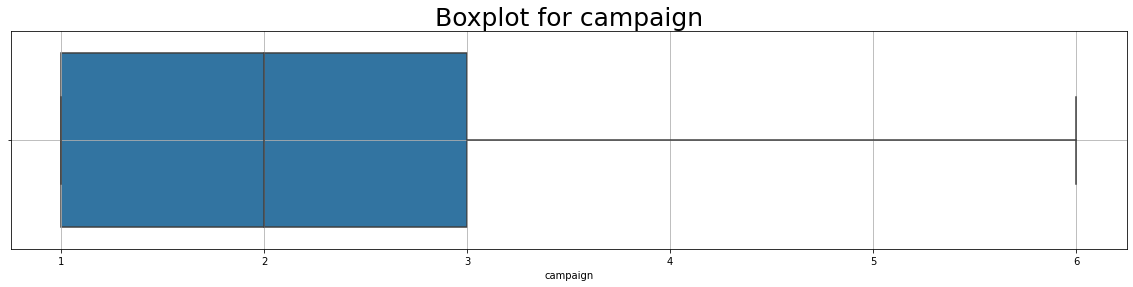

In [57]:
# boxplots after outlier removal

for col in cols2:
    plt.subplots(figsize=(20,4))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title('Boxplot for '+col,fontsize=25)
    plt.grid()

>- Now that we have removed the outliers from almost all numerical columns except 'previous'

### ii] Handle variables corresponding to the previous campaign

>- 'pdays','poutcome' and 'previous' are the major columns that were connected with the previous campaigns informations.
>- 'pdays' and 'poutcome' are already dropped from the dataset due to very high imbalance in those columns.
>- The same is observed in the case of 'previous' column

In [58]:
#Let's check for zero and non-zero values' counts

print("Total values in the column :",df.previous.count())
print("Count of rows where value is 0 :",df.loc[df['previous']==0,'previous'].count())
print("Count of rows where value is non-zero :",df.loc[df['previous']!=0,'previous'].count())
print("Percentage of 0 values in column :",(df.loc[df['previous']==0,'previous'].count()/df.previous.count())*100)


Total values in the column : 45211
Count of rows where value is 0 : 36954
Count of rows where value is non-zero : 8257
Percentage of 0 values in column : 81.73674548229414


>- Just like the other columns about previous campaigns' information ,this column also has a huge imbalance and can't be considered for model building.So it's better to drop this off.

In [59]:
# Dropping the 'previous' column

df.drop("previous",axis=1,inplace=True)

### Categorical Encoding

>- Now we have a clean set of categorical and numerical columns.But the issue is that we can't directly feed the categorical data into the model as machine understands only numbers, not text.
>- So we have to do categorical encoding techniques here.

- Since 'job','education' and 'month' follows a certain hierarchy we can use label encoding here.

##### Manual Label Encoding

In [60]:
# I am using my own ranking for jobs here
job_encoder = { 'management':5, 'technician':4, 'entrepreneur':6, 'blue-collar':6, 'unknown':1, 'retired':3, 'admin.':5,
                'services':3, 'self-employed':4, 'unemployed':1, 'housemaid':2, 'student':2 }

education_encoder = { 'tertiary':3, 'secondary':2, 'primary':1 }

month_encoder={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

df['job'] = df['job'].map(job_encoder)
df['education'] = df['education'].map(education_encoder)
df['month'] = df['month'].map(month_encoder)

##### Label Encoding Using LabelEncoder Function

In [61]:
remaining_cat_columns = categorical_columns
remaining_cat_columns.remove("job")
remaining_cat_columns.remove("education")
remaining_cat_columns.remove("month")
remaining_cat_columns.remove("marital") # we will use this for one-hot encoding
remaining_cat_columns.remove("contact") # we will use this for one-hot encoding
print(remaining_cat_columns)

['targeted', 'default', 'housing', 'loan']


In [62]:
# import label encoder function

from sklearn.preprocessing import LabelEncoder

In [63]:
# Label encoding the selected columns

df_label_encoded = df[remaining_cat_columns].apply(LabelEncoder().fit_transform)

In [64]:
# joining the label encoded columns and removing the original ones

for col in remaining_cat_columns:
    df.drop(col,axis=1,inplace=True)
df = df.join(df_label_encoded)

##### One-Hot Encoding

>- We have transformed almost all our variables to machine understandable form.Now let's transform the 'contact' and 'marital' columns using one-hot encoding technique
>- We are going to use dummies here to achieve that. 

In [65]:
# creating dummies for each values in remaining categorical columns ('contact','marital')

df = pd.get_dummies(df)

In [66]:
df

,age,job,salary,education,balance,day,month,duration,campaign,response,targeted,default,housing,loan,marital_divorced,marital_married,marital_single,contact_cellular,contact_e-mail/message,contact_telephone
0,58,5,100000,3,2143.0,5,5,261.0,1.0,0,1,0,1,0,0,1,0,0,1,0
1,44,4,60000,2,29.0,5,5,151.0,1.0,0,1,0,1,0,0,0,1,0,1,0
2,33,6,120000,2,2.0,5,5,76.0,1.0,0,1,0,1,1,0,1,0,0,1,0
3,47,6,20000,3,1506.0,5,5,92.0,1.0,0,0,0,1,0,0,1,0,0,1,0
4,33,1,0,3,1.0,5,5,198.0,1.0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,60000,3,825.0,17,11,643.0,3.0,1,1,0,0,0,0,1,0,1,0,0
45207,71,3,55000,1,1729.0,17,11,456.0,2.0,1,1,0,0,0,1,0,0,1,0,0
45208,72,3,55000,2,3462.0,17,11,643.0,5.0,1,1,0,0,0,0,1,0,1,0,0
45209,57,6,20000,2,668.0,17,11,508.0,4.0,0,1,0,0,0,0,1,0,0,0,1


In [67]:
df.shape

(45211, 20)

Text(0.5, 1.0, 'Correlation Between All Variables')

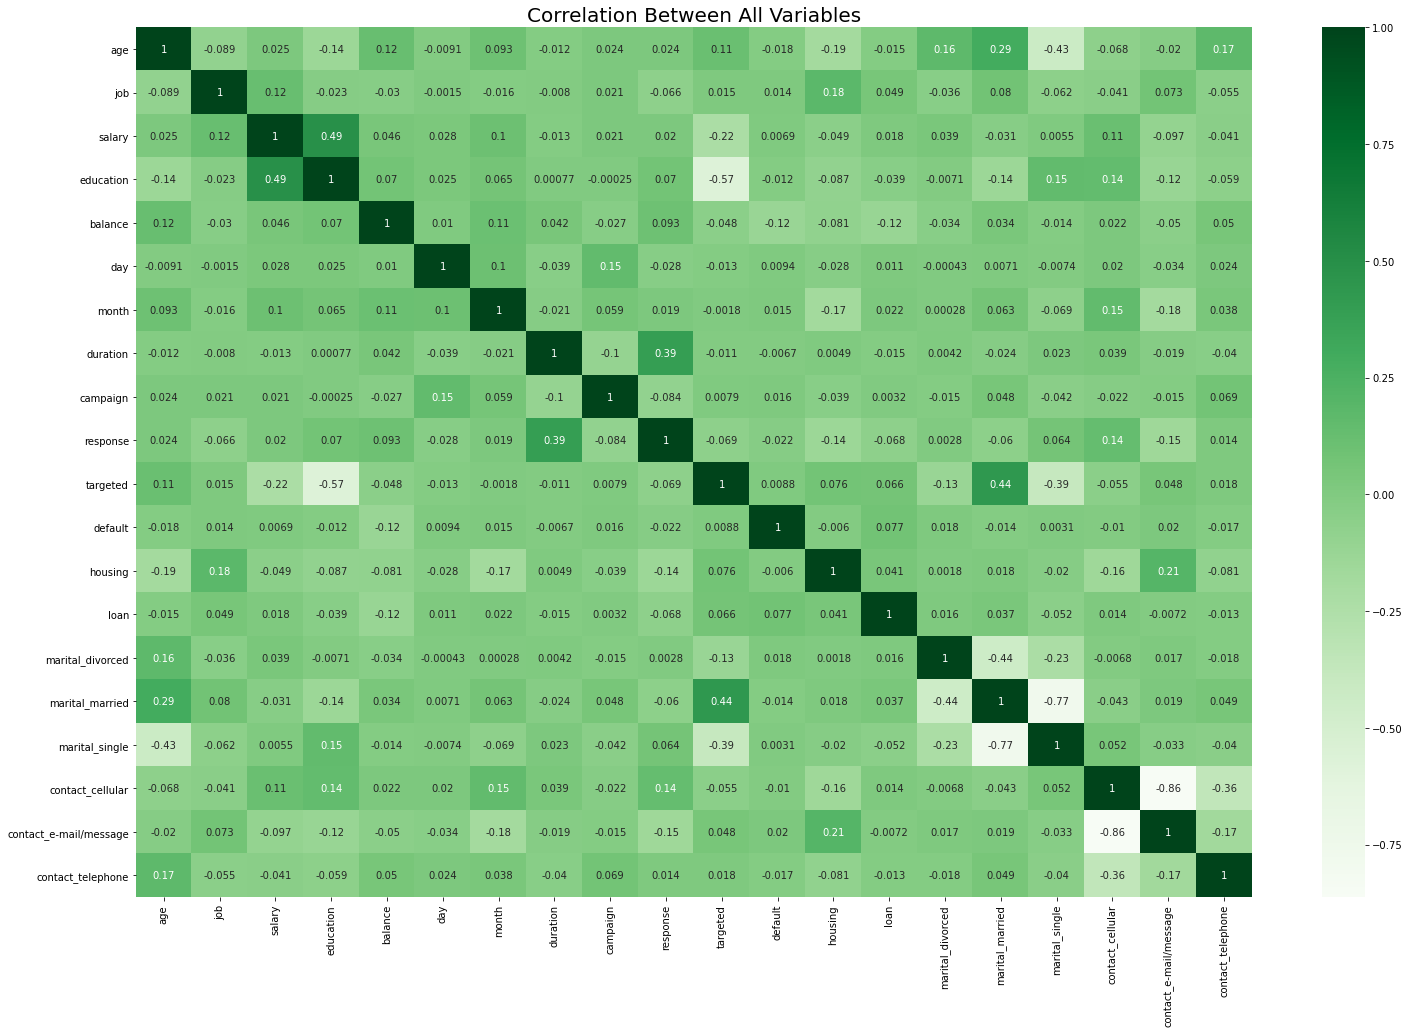

In [68]:
# Let's check for correlation among the variables now.

plt.figure(figsize=(25,16))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.title("Correlation Between All Variables",fontsize=20)

>- Newly created dummies shows a correlation among themselves which is quiet natural.But we can reduce that by removing one category among different categories for each column that has undergone one-hot encoding,as the values for this one category can easily be constructed using the other categireis' values. 
>- Another variable that creating high correlation with various other columns is the 'targeted' column.

- Let's check whether the 'targeted' variable has a good impact on our 'response' variable.

In [69]:
# The proportion of targeted and non-targeted people

print("Total values in the column :",df.targeted.count())
print("No.of people who are non-targeted :",df.loc[df['targeted']==0,'targeted'].count())
print("No.of people whoe are targeted :",df.loc[df['targeted']!=0,'targeted'].count())
print("Percentage of Non-targeted :",(df.loc[df['targeted']==0,'targeted'].count()/df.targeted.count())*100)

Total values in the column : 45211
No.of people who are non-targeted : 8120
No.of people whoe are targeted : 37091
Percentage of Non-targeted : 17.96023091725465


>- This column also shows a very high imbalance.More than 80% of the data says that 'yes,the customer is targeted'.Then why should we need another category 'No'.It's just another 20%.Instead of treating them as non-targeted why can't we consider them also in the atrgeted section as it won't do any harm to our business,rather may increase the chance of them getting converted.

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

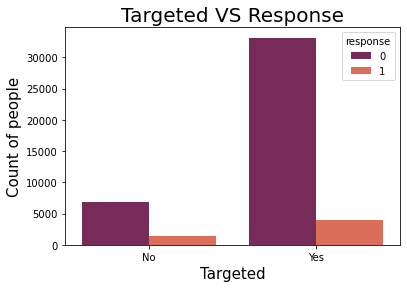

In [70]:
# let's check it's association with our target variable.

s1 = sns.countplot(df.targeted, hue=df.response,palette='rocket')

plt.title("Targeted VS Response",fontsize=20)
plt.ylabel("Count of people",fontsize=15)
plt.xlabel("Targeted",fontsize=15)
s1.set_xticklabels({"No":0,"Yes":1})

>- From the count plot it is clear that there is not much of an impact by categorising the customers into targeted and non-targeted segments.
>- So let's drop this column as well.

- As already discussed let's drop one of the categories from the newly created dummies.
- Let's remove the 'targeted' column also, and then recheck the correlation among the variables.

In [71]:
# The columns to be dropped from dummies are selected as per my choice here

df2 = df.drop(["contact_e-mail/message","marital_single","targeted"],axis=1)

Text(0.5, 1.0, 'Correlation Between All Numerical Variables')

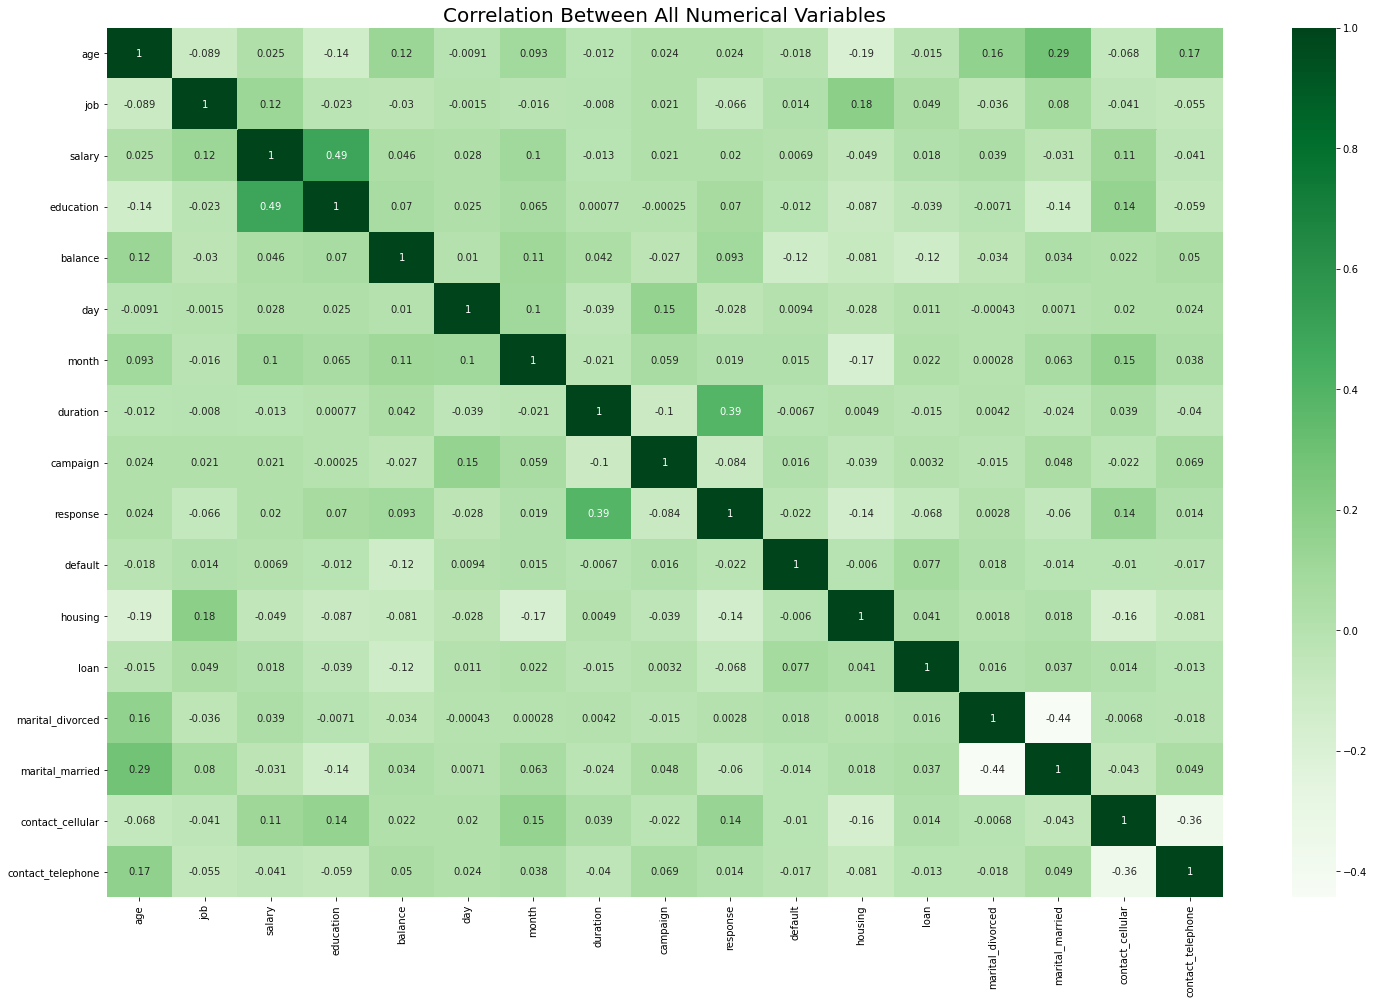

In [72]:
# Plot again the heatmap of correlation matrix

plt.figure(figsize=(25,16))
sns.heatmap(df2.corr(),annot=True,cmap='Greens')
plt.title("Correlation Between All Numerical Variables",fontsize=20)

>- Yes.The correlation among variables has come down to a greater extent.

### iii] Train-Test Split

##### Before doing the train test split let's scale the data

>- The independent features should be converted to a standard values.Here I am going to use $Standard$ $scaling$ technique.

In [73]:
#Let's store the independent and dependent variables to X and y

X = df2.drop(['response'], axis=1)
y = df2['response']

In [74]:
# import the scaling function

from sklearn.preprocessing import StandardScaler

In [75]:
# transform the values

scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 1.61352043,  0.39714078,  1.3399826 , ...,  0.81321217,
        -1.35602988, -0.26209091],
       [ 0.29042833, -0.36074752,  0.09330824, ..., -1.22969139,
        -1.35602988, -0.26209091],
       [-0.74914404,  1.15502908,  1.96331978, ...,  0.81321217,
        -1.35602988, -0.26209091],
       ...,
       [ 2.93661253, -1.11863582, -0.06252605, ...,  0.81321217,
         0.73744688, -0.26209091],
       [ 1.51901385,  1.15502908, -1.15336611, ...,  0.81321217,
        -1.35602988,  3.81547001],
       [-0.37111773,  1.15502908,  1.96331978, ...,  0.81321217,
         0.73744688, -0.26209091]])

In [76]:
# Create new dataframe for scaled independent variables

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,age,job,salary,education,balance,day,month,duration,campaign,default,housing,loan,marital_divorced,marital_married,contact_cellular,contact_telephone
0,1.613520,0.397141,1.339983,1.212713,1.027653,-1.298476,-0.475354,0.147445,-0.870092,-0.13549,0.893915,-0.436803,-0.36078,0.813212,-1.35603,-0.262091
1,0.290428,-0.360748,0.093308,-0.272979,-0.768817,-1.298476,-0.475354,-0.474910,-0.870092,-0.13549,0.893915,-0.436803,-0.36078,-1.229691,-1.35603,-0.262091
2,-0.749144,1.155029,1.963320,-0.272979,-0.791761,-1.298476,-0.475354,-0.899243,-0.870092,-0.13549,0.893915,2.289359,-0.36078,0.813212,-1.35603,-0.262091
3,0.573948,1.155029,-1.153366,1.212713,0.486333,-1.298476,-0.475354,-0.808718,-0.870092,-0.13549,0.893915,-0.436803,-0.36078,0.813212,-1.35603,-0.262091
4,-0.749144,-2.634412,-1.776703,1.212713,-0.792611,-1.298476,-0.475354,-0.208994,-0.870092,-0.13549,-1.118674,-0.436803,-0.36078,-1.229691,-1.35603,-0.262091


##### Now let's do the real train-test splitting of data

In [77]:
# Let's import the function for train test data splitting

from sklearn.model_selection import train_test_split

In [78]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=50)

>- We have successfully split the data to training and testing data.80% for training and 20% for testing.

# Predictive model 1: Logistic regression

### Make a predictive model using logistic regression

In [79]:
# import logistic regression 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [80]:
# Making a model with all features to understand the performance
# model_1

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [82]:
print("\033[1m","Confusion matrix","\033[0m","\n","\n",confusion_matrix(y_test,y_pred))
print()
print("\033[1m","Accuracy score","\033[0m","\n","\n",accuracy_score(y_test,y_pred))
print()
print("\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_pred))

 Confusion matrix  
 
 [[7796  209]
 [ 801  237]]

 Accuracy score  
 
 0.8883114010837112

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8005
           1       0.53      0.23      0.32      1038

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



>- The report looks convincing.Still,let's go for recursive feature elimination.

### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [83]:
X_train.shape

(36168, 16)

>- We have 16 features in our X_scaled.We have to use the best features for building the model.
>- For that we will be using Recursive Feature Elimination(RFE) Technique.RFE function will give us the ranking of the features based on which we can select the suitable variables.

In [84]:
#recursive feature elimination :- removing weakest features until required no.of feature are reached
# Here out of our 16 features we are going to select the best 15 features

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)                           # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [85]:
selected_cols = X_train.columns[rfe.support_]
print("RFE supporting variables : ",list(selected_cols))

RFE supporting variables :  ['age', 'job', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'default', 'housing', 'loan', 'marital_divorced', 'marital_married', 'contact_cellular', 'contact_telephone']


In [86]:
rejected_cols = X_train.columns[~rfe.support_]
print("RFE not supporting variables : ",list(rejected_cols))

RFE not supporting variables :  ['salary']


In [87]:
X_train2 = X_train.drop(rejected_cols,1)
X_test2 = X_test.drop(rejected_cols,1)

In [88]:
# model_2

LR = LogisticRegression()
LR.fit(X_train2, y_train)
y_pred2 = LR.predict(X_test2)

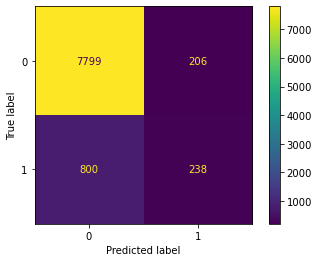

In [89]:
from sklearn.metrics import  plot_confusion_matrix

plot_confusion_matrix(LR,X_test2,y_test)

In [90]:
print("\033[1m","Confusion matrix","\033[0m","\n","\n",confusion_matrix(y_test,y_pred2))
print()
print("\033[1m","Accuracy score","\033[0m","\n","\n",accuracy_score(y_test,y_pred2))
print()
print("\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_pred2))

 Confusion matrix  
 
 [[7799  206]
 [ 800  238]]

 Accuracy score  
 
 0.8887537321685282

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8005
           1       0.54      0.23      0.32      1038

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



>- We can see a slight increase in the accuracy score and The confusion matrix values are also improved

### Using VIF get rid of the redundant features

##### Let's look for Variance inflation Factor (VIF)

In [91]:
# import VIF function from statsmodels library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
VIF = pd.DataFrame()
VIF['Features'] = X_train2.columns
VIF['Var_IF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
VIF['Var_IF'] = round(VIF['Var_IF'], 2)
VIF = VIF.sort_values(by = "Var_IF", ascending = False)
VIF

,Features,Var_IF
12,marital_married,1.55
11,marital_divorced,1.43
0,age,1.37
13,contact_cellular,1.24
14,contact_telephone,1.21
9,housing,1.15
5,month,1.09
2,education,1.07
3,balance,1.07
1,job,1.05


>- The VIF values looks convincing and the existence of multi collinearity is minimum amomg the chosen variables.
>- So we can continue our prediction using this model.

In [93]:
# Comapring the actual and predicted values

comparison = pd.DataFrame()
comparison["Predicted values"] = y_pred2
comparison["Actual Values"] = y_test.values
comparison

,Predicted values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9038,0,0
9039,0,0
9040,0,0
9041,0,0


>- Looks good...! let's validate our model using K-fold validation

### Estimate the model performance using k-fold cross validation

>- In this technique of K-Fold cross-validation, the whole dataset is partitioned into K parts of equal size. Each partition is called a “Fold“.So as we have K parts we call it K-Folds. One Fold is used as a validation set and the remaining K-1 folds are used as the training set
>- The final accuracy of the model is computed by taking the mean accuracy of the k-models validation data.

In [94]:
# Import necessary functions to perform k-fold cross validation

from sklearn.model_selection import cross_val_score,KFold

y1 = y
X1 = X_scaled

# I am going to iterate over a range of 10 to find a k value that best suits our data

for i in range(2,11):
    k_fold = KFold(n_splits = i)
    score = cross_val_score (LR,X1,y1,cv=k_fold)
    mean_score = score.mean()
    accuracy = round(mean_score,2)

    print("\n\033[1m","Cross Validation Scores for k = ",i," folds are : ","\033[0m","\n\n",score)
    print("\n\033[1m","Training set accuracy : ","\033[0m",(round(score[-1],2))*100,"%")
    print("\n\033[1m","Average Prediction accuracy is : ","\033[0m",accuracy*100,"%")


 Cross Validation Scores for k =  2  folds are :   

 [0.92471025 0.81185578]

 Training set accuracy :   81.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  3  folds are :   

 [0.91115387 0.88706038 0.75666888]

 Training set accuracy :   76.0 %

 Average Prediction accuracy is :   85.0 %

 Cross Validation Scores for k =  4  folds are :   

 [0.96142617 0.9309033  0.88206671 0.73916121]

 Training set accuracy :   74.0 %

 Average Prediction accuracy is :   88.0 %

 Cross Validation Scores for k =  5  folds are :   

 [0.96594051 0.93906215 0.91074983 0.8516921  0.7058173 ]

 Training set accuracy :   71.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  6  folds are :   

 [0.96881635 0.9450564  0.93125415 0.9128069  0.86529529 0.66330458]

 Training set accuracy :   66.0 %

 Average Prediction accuracy is :   88.0 %

 Cross Validation Scores for k =  7  folds are :   

 [0.96857099 0.9557207  0.9298653  0.92738814 

>- The we can see here that the training set accuracy keeps on decreasing when the k value increases.
>- So let's take k = 5 here since that looks fairly accurate for training and overall accuracy

In [95]:
k_fold = KFold(n_splits = 5)
score = cross_val_score (LR,X1,y1,cv=k_fold)
mean_score = score.mean()
accuracy = round(mean_score,2)

print("\n\033[1m","Cross Validation Scores for k = ",5," folds are : ","\033[0m","\n\n",score)
print("\n\033[1m","Training set accuracy : ","\033[0m",(round(score[-1],2))*100,"%")
print("\n\033[1m","Average Prediction accuracy is : ","\033[0m",accuracy*100,"%")


 Cross Validation Scores for k =  5  folds are :   

 [0.96594051 0.93906215 0.91074983 0.8516921  0.7058173 ]

 Training set accuracy :   71.0 %

 Average Prediction accuracy is :   87.0 %


### What is the precision, recall and accuracy of your model?

In [96]:
LR_Accuracy = accuracy_score(y_test,y_pred2)
LR_Accuracy_percentage = round(LR_Accuracy,2)*100

print("\n\033[1m","Accuracy score : ","\033[0m",LR_Accuracy_percentage,"%\n",)
print("\033[1m","Classification Report :","\033[0m","\n","\n",classification_report(y_test,y_pred2))


 Accuracy score :   89.0 %

 Classification Report :  
 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8005
           1       0.54      0.23      0.32      1038

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



>- The logistic regression model has an accuracy of 89%.This actually shows the percentage of all correct predictions among the total number of predictions made.
>- Recall has a value of 0.97 that means, 97%, which is actually a very good value.It shows the ratio of desirable results that are predicted right to the sum of desirable results that are predicted right and desirable results that are predicted wrong.
>- Precision has a value of 0.91.This is also a good value since it shows the ratio of correct positive predictions to all positive predictions.

### Which features are the most important from your model?

>- We have done Recursive Feature Elimination technique to avoid un important columns and build our model with importantmodels.Since we have ony 16 features after all the data cleaning and preprocessing we removed only one feature before model building using RFE.
>- We can use RFE to rank our features.Let's check the importance of each column using RFE ranking

In [97]:
#Let's find out the ranks of each column using RFE technique

rfe2 = RFE(logreg, 1)             # running RFE with 1 variables as output
rfe2 = rfe2.fit(X_train, y_train)

In [98]:
# Let's have a look at each column and it's rank

Feature_rank = dict(zip(list(rfe2.ranking_),list(X_train.columns)))
Feature_rank_sorted = sorted(Feature_rank.items())
dict(Feature_rank_sorted)

{1: 'duration',
 2: 'housing',
 3: 'contact_cellular',
 4: 'contact_telephone',
 5: 'campaign',
 6: 'loan',
 7: 'balance',
 8: 'marital_married',
 9: 'education',
 10: 'job',
 11: 'marital_divorced',
 12: 'age',
 13: 'day',
 14: 'default',
 15: 'month',
 16: 'salary'}

>- The result above shows the importance of each feature for our model.
>- Eventhough the machine gives us a good order of feature selection,if the data were balanced, my personal top 10 feature choices will be 
>>- 1: 'duration'
>>- 2: 'campaign'
>>- 3: 'default'
>>- 4: 'loan'
>>- 5: 'housing'
>>- 6: 'balance'
>>- 7: 'age'
>>- 8: 'education'
>>- 9: 'job'
>>- 10: 'marital_married'

# Predictive model 2: Random Forest

### i] Make a predictive model using Random Forest technique
### ii] Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [99]:
# Let's import the functions to do random forest classification.

from sklearn.ensemble import RandomForestClassifier

# Model_1

RFC = RandomForestClassifier(n_estimators=30, random_state=50,max_depth=10,min_samples_split=500)
RFC.fit(X_train,y_train)
y_predicted = RFC.predict(X_test)

>- Let's limit the no.of trees to 25 and the maximum depth to 10 as we have only 16 variables in our dataset.
>- Here I am choosing a minimum sample required for splitting the data as 500 (approximately 1% of total records)

In [100]:
print("\033[1m","Confusion matrix","\033[0m","\n","\n",confusion_matrix(y_test,y_predicted))
print()
print("\033[1m","Accuracy score","\033[0m","\n","\n",accuracy_score(y_test,y_predicted))
print()
print("\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_predicted))

 Confusion matrix  
 
 [[7932   73]
 [ 930  108]]

 Accuracy score  
 
 0.8890854804821409

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      8005
           1       0.60      0.10      0.18      1038

    accuracy                           0.89      9043
   macro avg       0.75      0.55      0.56      9043
weighted avg       0.86      0.89      0.85      9043



### iii] Estimate the model performance using K-Fold cross validation

In [101]:
# Import necessary functions to perform k-fold cross validation (already done. Doing for easy reference)

from sklearn.model_selection import cross_val_score,KFold

y1 = y
X1 = X_scaled

# I am going to iterate over a range of 10 to find a k value that best suits our data

for i in range(2,11):
    k_fold = KFold(n_splits = i)
    score_RFC = cross_val_score (RFC,X1,y1,cv=k_fold)
    mean_score_RFC = score.mean()
    accuracy_RFC = round(mean_score_RFC,2)

    print("\n\033[1m","Cross Validation Scores for k = ",i," folds are : ","\033[0m","\n\n",score_RFC)
    print("\n\033[1m","Training set accuracy : ","\033[0m",(round(score_RFC[-1],2))*100,"%")
    print("\n\033[1m","Average Prediction accuracy is : ","\033[0m",accuracy_RFC*100,"%")


 Cross Validation Scores for k =  2  folds are :   

 [0.93448642 0.81459854]

 Training set accuracy :   81.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  3  folds are :   

 [0.95541105 0.86257465 0.75076311]

 Training set accuracy :   75.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  4  folds are :   

 [0.96284172 0.94125453 0.83535345 0.72243851]

 Training set accuracy :   72.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  5  folds are :   

 [0.96571934 0.94315417 0.90333997 0.72495023 0.68978102]

 Training set accuracy :   69.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  6  folds are :   

 [0.96894904 0.94824154 0.9393497  0.87763769 0.86848042 0.64326476]

 Training set accuracy :   64.0 %

 Average Prediction accuracy is :   87.0 %

 Cross Validation Scores for k =  7  folds are :   

 [0.96903545 0.95525623 0.93884502 0.94256077 

>- From the above report it is clear that as partition the data to smaller sets the training accuracy keeps on decreasing.
>- Here K=3 gives a fair accuracy for training as well as testing.So let's go with K=3.

In [102]:
k_fold = KFold(n_splits = 3)
score_RFC = cross_val_score (RFC,X1,y1,cv=k_fold)
mean_score_RFC = score.mean()
accuracy_RFC = round(mean_score_RFC,2)

print("\n\033[1m","Cross Validation Scores for k = ",3," folds are : ","\033[0m","\n\n",score_RFC)
print("\n\033[1m","Training set accuracy : ","\033[0m",(round(score_RFC[-1],2))*100,"%")
print("\n\033[1m","Average Prediction accuracy is : ","\033[0m",accuracy_RFC*100,"%")


 Cross Validation Scores for k =  3  folds are :   

 [0.95541105 0.86257465 0.75076311]

 Training set accuracy :   75.0 %

 Average Prediction accuracy is :   87.0 %


### iv] What is the precision, recall, accuracy of your model?


In [103]:
print("\n\033[1m","Accuracy score","\033[0m","\n","\n",accuracy_score(y_test,y_predicted))
print()
print("\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_predicted))


 Accuracy score  
 
 0.8890854804821409

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      8005
           1       0.60      0.10      0.18      1038

    accuracy                           0.89      9043
   macro avg       0.75      0.55      0.56      9043
weighted avg       0.86      0.89      0.85      9043



### v] Using the feature importance values from the Random Forest module, identify the most important features              for the model


In [104]:
# Store the Important features and it's value to a variable

imp_features = pd.DataFrame({"feature": list(X_train.columns),
                             "importance": RFC.feature_importances_ }).sort_values("importance", ascending=False)

imp_features['Rank']= [i for i in range(1,17)]
imp_features.set_index('Rank')

,feature,importance
Rank,,
1,duration,0.606197
2,age,0.087512
3,month,0.086585
4,contact_cellular,0.052355
5,housing,0.051375
6,day,0.032262
7,balance,0.021485
8,campaign,0.016252
9,salary,0.013474


>- From the above table it can be seen that which are the important variables in this random forest classifier.

# Compare the performance of the Random Forest and the logistic model –

### Evaluate both models on the test set

In [105]:
# Logistic Regression

y_pred2 = LR.predict(X_test2)

print("\033[1m","Accuracy score of Logistic Regression Model ","\033[0m","\n","\n",accuracy_score(y_test,y_pred2))
print("\n\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_pred2))

 Accuracy score of Logistic Regression Model   
 
 0.8887537321685282

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8005
           1       0.54      0.23      0.32      1038

    accuracy                           0.89      9043
   macro avg       0.72      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



In [106]:
# Random forest

y_predicted = RFC.predict(X_test)

print("\033[1m","Accuracy score of Random forest model ","\033[0m","\n","\n",accuracy_score(y_test,y_predicted))
print("\n\033[1m","Classification Report","\033[0m","\n","\n",classification_report(y_test,y_predicted))

 Accuracy score of Random forest model   
 
 0.8890854804821409

 Classification Report  
 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      8005
           1       0.60      0.10      0.18      1038

    accuracy                           0.89      9043
   macro avg       0.75      0.55      0.56      9043
weighted avg       0.86      0.89      0.85      9043



### Which metric did you choose and why?

>- In general accuracy itself is giving a good value.It takes into account all the right predictions made in the total predictons.So accuracy is a good measure to consider here.
>- Recall gives us the ratio of desirable predictions to the sum of desirable predictions and preditions that could have been desirable if predicted right.So Recall is the other variable that we should consider here.
>- It's Ok to predict a non-converting person as a converting person,since that won't reduce the number of potential customers.So even if the precision is slightly low that doesn't matter.

>- Our target variable here is whether the customer will say 'Yes' to the term deposit or 'No'.
>- It is okay to mispredict some customers who said actually a 'No' as 'Yes'.But customers who said 'Yes' should not be mispredicted as 'No', as this will lead to treating that customer as less important and resulting in loosing one potential customer.
>- Thus accuracy and recall are the measures I considered for these models.

### Which model has better performance on the test set?

>- For this specific dataset, after pre-processing and cleaning, both the models (Logistic regression and Random forest) have given a similar performance characteristics.
>- The accuracy of both the models are same.The recall value is slightly better for Random Forest model.

### Compare the feature importance from the different models – do they agree? Are the topfeatures similar in both models?


In [107]:
# Feature Ranking in Random forest model

dict(Feature_rank_sorted)

{1: 'duration',
 2: 'housing',
 3: 'contact_cellular',
 4: 'contact_telephone',
 5: 'campaign',
 6: 'loan',
 7: 'balance',
 8: 'marital_married',
 9: 'education',
 10: 'job',
 11: 'marital_divorced',
 12: 'age',
 13: 'day',
 14: 'default',
 15: 'month',
 16: 'salary'}

In [108]:
# Feature Ranking in Random forest model

imp_features.set_index('Rank')

,feature,importance
Rank,,
1,duration,0.606197
2,age,0.087512
3,month,0.086585
4,contact_cellular,0.052355
5,housing,0.051375
6,day,0.032262
7,balance,0.021485
8,campaign,0.016252
9,salary,0.013474


>- The feature importance is different for the two models.
>- Both the models have their own ways of selecting the important variables.
>- Even though there are significant difference in feature ranking for bothe models, 6 out of the Top 10 features are same for both the models.

$Predictive$ $modelling$ $By$ $Alwin$ $Mathew$